In [165]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
import astropy.constants as const
import matplotlib as mpl
from matplotlib.ticker import LogLocator
from matplotlib.lines import Line2D

## Astropoy.cosmology can be removed if Figure 3 with redshift and high redshift flux is not necessary.
import astropy.cosmology.units as cu
from astropy.cosmology import FlatLambdaCDM, z_at_value, Planck18

fs=12

mpl.rcParams['xtick.labelsize'] = fs
mpl.rcParams['ytick.labelsize'] = fs
plt.rcParams.update({'mathtext.default': 'regular' })

colors=['#1845FB', '#C91F16', '#FF5E02', '#C849A9', '#656364', '#86C8DD', '#578DFF']

In the below functions; $F$ is flux, $A$ is telescope area, $e$ is telescope efficiency, $Q$ is quantum efficinecy, $t$ is integration time, $N_r$ is readout noise, $i$ is dark current, $F_b$ is background brightness, and $\Omega$ is pixel size.

$$
A_\epsilon = A\epsilon Q, \qquad \qquad \frac{S}{N} = \frac{FA_\epsilon \tau}{[N_R^2+ \tau(i_{DC} + F_BA_\epsilon \Omega)]^{1/2}}.
$$

Using the standard zero point of 3631 Jy, let's considering the energy per photon at of a beam at 550nm,

\begin{equation*}
F_\nu(m=0) = 3631\text{ Jy} = 3.631 \times 10^{-23} \text {W m}^{-2} \text{ Hz}^{-1} = 3.631 \times 10^{-20} \text {ergs s}^{-1} \text{cm}^{-2} \text{ Hz}^{-1}
\end{equation*}

\begin{equation*}
\nu = c/\lambda \approx 545 \text{ THz} = 5.45 \times 10^{14} \text{ Hz} \qquad E = hc/\lambda = hc/550 \text{ nm} \approx 3.6 \times 10^{-12} \text{ergs}
\end{equation*}



Combining,
\begin{equation*}
F(m=0) = F_\nu(m=0)\nu = 3.631 \times 10^{-20} \text {ergs s}^{-1} \text{cm}^{-2} \text{ Hz}^{-1} \times 5.45 \times 10^{14} \text{ Hz} \approx 2 \times 10^{-5} \text{ ergs cm}^{-2}
\end{equation*}

Photon Flux,
\begin{equation*}
2\times 10^{-5} \text{ ergs cm}^{-2} \text{ s}^{-1} \times \frac{1 \text{ photon}}{3.6\times10^{-12} \text{ ergs}} = 5.48 \times 10^6 \frac{\text{photons}}{\text{cm}^2\times\text{s}} = 5 \times 10^{10} \frac{\text{photons}}{\text{m}^2\times\text{s}}
\end{equation*}

<!-- For a source five magnitudes higher, the flux is 100 times smaller by definition which we combine with our known zero point to yield a flux formula.
\begin{align*}
m &= -2.5\log{f} + m_0 \\
0 &= -2.5\log{\left(5.48 \times 10^6\right)} + m_0 \\
m_0 &= 2.5\log{\left(5.48 \times 10^6\right)} \approx 16.85\\
m &= -2.5\log{f} + 16.85\\
f &= 10^{0.4(16.84-m)}
\end{align*}

Which yields $F(m=0) = 5.48\times 10^6$, $F(m=5) = 5.48\times 10^4$, $F(m=10) = 5.48\times 10^2$, $F(m=15) = 5.48$, etc. as desired. -->

Let's explore some Earth2016 examples. The power $P$(W) for a given civilization class $S$ as defined in Lubin (2016) is

$$ P = F_e\epsilon_c10^{2S} $$

The civilization class is $S$ where $S$ is the side length in meters of a square laser array converting solar power to laser power. 
By this definition, a class 5 civilization is similar to a Kardashev Type I while a class 11 civilization is similar to a Kardashev Type II.
Our calculations make the following assumptions: solar illumination $F_e = 1400{\text{W/m}^2}$ (based on the solar illumination at the top of the Earth's atmosphere), and conversion efficiency of solar power to laser power $\epsilon_c = 0.5$. 
The PHOTON flux $F(\text{photons } \text{m}^{-2} \text{s}^{-1})$ of a laser emitted from distance $L$(m) by a civilization of class $S$ is
$$ F = \frac{\xi P}{L^2\Omega} = \frac{\xi F_e \epsilon_c 10^{4S}}{4L^2\lambda^2} = \frac{1}{4hc} \frac{F_e \epsilon_c 10^{4S}}{\lambda L^2} = \frac{175}{hc} \frac{10^{4S}}{\lambda L^2}. $$

Meanwhile, the APPARENT flux in $\text{W/m}^2$ is
$$ F_W = \frac{P}{L^2\Omega} = \frac{F_e \epsilon_c 10^{4S}}{4L^2\lambda^2} = 175 \frac{10^{4S}}{L^2\lambda^2} $$

where $\xi(\text{J}) = \lambda/hc$ for a given wavelength $\lambda(\text{m})$ and solid angle $\Omega(\text{sr}) = 4\lambda^210^{-2S} \text{sr}$ (see Lubin 2016).

# Unused Figure

SNR over Magnitude of a given (OSETI) Source for LGTS using LCO 0.4 m telescopes.

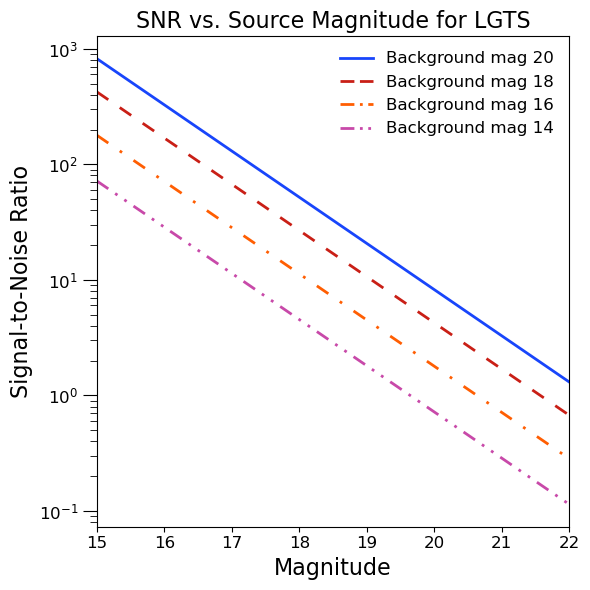

In [166]:
wavelength = 550*u.nm

mag_to_fluxW = lambda M: M.to(u.W / u.m**2, equivalencies=u.spectral_density(wavelength))
#Somebody should improve this to enable recursive conversions
mag_to_fluxP = lambda M: M.to(u.W / u.m**2, equivalencies=u.spectral_density(wavelength)).to(u.photon / (u.m**2 * u.s), equivalencies=u.spectral_density(wavelength))

fluxW_to_mag = lambda F: F.to(u.ABmag, equivalencies=u.spectral_density(wavelength))
fluxP_to_mag = lambda F: F.to(u.W / u.m**2, equivalencies=u.spectral_density(wavelength)).to(u.ABmag, equivalencies=u.spectral_density(wavelength))

## Simple versions without astropy
# mag_to_fluxW = lambda mag: 10**(2/5*(mW_0-mag))*(u.W/u.m**2/u.s) #converts magnitude to flux in watts
# fluxW_to_mag = lambda flux: mW_0-2.5*np.log10(flux*(u.W/u.m**2/u.s)) #converts flux in watts to magnitude

# mag_to_fluxP = lambda mag: 10**(2/5*(mP_0-mag))*(u.m**-2*u.s**-1) #converts magnitude to photon flux
# fluxP_to_mag = lambda flux: mP_0-2.5*np.log10(flux*(u.m**-2*u.s**-1)) #converts photon flux to magnitude

SBIG_A = 0.2**2*np.pi*u.m**2                 #1257 cm^2 detector area
FWHM = (0.571*u.arcsec)**2 + (1*u.arcsec)**2 #0.571 arcsec^2 pixel size convolved with a 1 arcsec
def SigNoise(M, M_b=21*u.ABmag, A=SBIG_A, e=0.5, Q=0.5*u.ct/u.photon, t=10*u.s, t_p=None, N_r=14.5*u.ct, i_DC=0.03*u.ct/u.s, Omega=FWHM):
    """
    Calculates the signal-to-noise ratio of a source.
    Args:
    - M: Magnitude of the source.
    - M_b: Background magnitude.
    - A: Area of the detector.
    - e: Efficiency of the detector.
    - Q: Quantum efficiency of the detector.
    - t: Integration time.
    - t_p: duration of the pulse (if not equal to the integration time)
    - N_r: Readout noise.
    - i_DC: Dark current.
    - Omega: Beam divergence solid angle.
    """
    if t_p is None:
        t_p = t
    A_e = A*e*Q
    F = mag_to_fluxP(M)
    F_b = mag_to_fluxP(M_b)/u.arcsec**2 #This mandates the background mag be gived in mag/arcsec^2
    SN = ((F*A_e*t_p)/(N_r**2+t*(i_DC+F_b*A_e*Omega)*u.ct)**.5).to(1) #u.ct and u.ct^2 can be added because the variance of the poisson distribution equals the mean
    return SN

mag = np.linspace(15,22,1000)*u.ABmag

plt.figure(figsize=(6,6), dpi=100)

plt.semilogy(mag, SigNoise(mag, 20*u.ABmag), color=colors[0], label="Background mag 20", linewidth=2, linestyle='-')
plt.semilogy(mag, SigNoise(mag, 18*u.ABmag), color=colors[1], label="Background mag 18", linewidth=2, linestyle=(0, (5, 5)))
plt.semilogy(mag, SigNoise(mag, 16*u.ABmag), color=colors[2], label="Background mag 16", linewidth=2, linestyle=(0, (5, 5, 1, 5)))
plt.semilogy(mag, SigNoise(mag, 14*u.ABmag), color=colors[3], label="Background mag 14", linewidth=2, linestyle=(0, (5, 3, 1, 3, 1, 3)))


plt.title("SNR vs. Source Magnitude for LGTS", fontsize=16)
plt.ylabel("Signal-to-Noise Ratio", fontsize=16)
plt.xlabel("Magnitude", fontsize=16)

custom_handles = [
    Line2D([0], [0], color=colors[0], lw=2, linestyle='-', label="Background mag 20"),
    Line2D([0], [0], color=colors[1], lw=2, linestyle=(0, (5, 2)), label="Background mag 18"),
    Line2D([0], [0], color=colors[2], lw=2, linestyle=(0, (5, 2, 1, 2)), label="Background mag 16"),
    Line2D([0], [0], color=colors[3], lw=2, linestyle=(0, (5, 2, 1, 2, 1, 3)), label="Background mag 14"),
]

plt.legend(handles=custom_handles, loc='upper right', fontsize=12, frameon=False)
plt.tick_params('y', length=10, which='major')
plt.tick_params('y', length=5, which='minor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(15, 22)

plt.tight_layout()
plt.show()

# DE-STAR Example Calculations

In [167]:
class_to_solar_power = lambda S: 700*10**(2*S)*u.W #converts civilization class to solar power of the array in watts
solar_power_to_class = lambda P: (np.log10(P.to(u.W).value/700)/2) #converts solar power of the array to civilization class

def get_fluxP(S, wavelength, L):
    """
    Calculates the flux in photons per m^2 per second.
    Args:
    - S: Civilization class.
    - wavelength: Laser wavelength.
    - L: Distance to the array.
    """
    return (175*u.W*u.m**2*(10)**(4*S)/(const.h*const.c*wavelength*L**2)).to(u.m**-2*u.s**-1) #returns the flux in photons per m^2 per second

def get_fluxW(S, wavelength, L):
    """
    Calculates the flux in W/m^2.
    Args:
    - S: Civilization class.
    - wavelength: Laser wavelength.
    - L: Distance to the array.
    """
    return (175*u.W*u.m**2*(10)**(4*S)/((wavelength*L)**2)).to(u.W/u.m**2) #returns the flux in W/m^2

print(f"1% of the US's 2024 solar power would be a class {solar_power_to_class(239e+7*u.W):.2f} DE-STAR array.") #1GW array, 1% of the US's current solar power
print(f"The US's 2024 solar power would be a class {solar_power_to_class(239e+9*u.W):.2f} DE-STAR array.") #1GW array, 1% of the US's current solar power

wavelength = 550 *u.nm #nm, peak of the visible spectrum
L = 2.56 *u.Mlyr #Mly, ±0.11 Mly

FW_S4 = get_fluxW(4, wavelength, L) #flux of a class 4 laser array
FP_S4 = get_fluxP(4, wavelength, L) #Photon flux of a class 4 laser array
M_S4 = fluxW_to_mag(FW_S4) #magnitude of a class 4 laser array
print(f"A class 4 laser array has Flux {FW_S4:.2e} and magnitude {M_S4.value:.2f}")

1% of the US's 2024 solar power would be a class 3.27 DE-STAR array.
The US's 2024 solar power would be a class 4.27 DE-STAR array.
A class 4 laser array has Flux 9.86e-15 W / m2 and magnitude 15.76


# Unused Figure

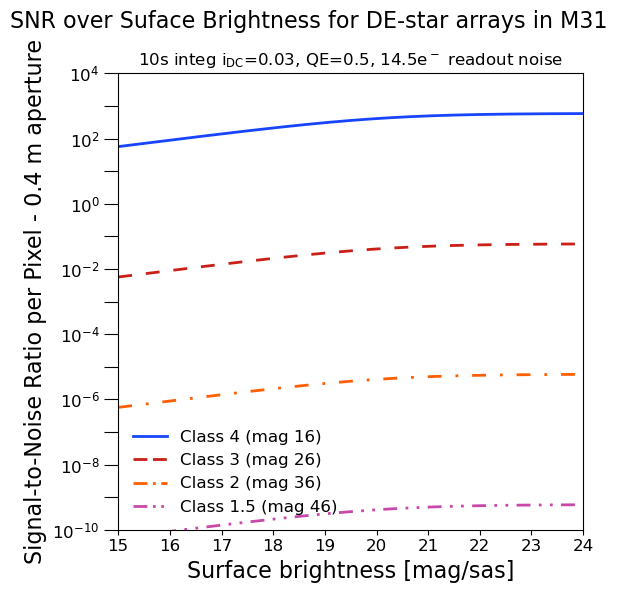

In [168]:
mag = np.linspace(15,24,1000)*u.ABmag #Background magnitude range

FW_S15 = get_fluxW(1, wavelength, L) #flux of a class 1.5 laser array
M_S15 = fluxW_to_mag(FW_S15) #magnitude of a class 1.5 laser array

FW_S2 = get_fluxW(2, wavelength, L) #flux of a class 2 laser array
M_S2 = fluxW_to_mag(FW_S2) #magnitude of a class 2 laser array

FW_S3 = get_fluxW(3, wavelength, L) #flux of a class 3 laser array
M_S3 = fluxW_to_mag(FW_S3) #magnitude of a class 3 laser array

FW_S4 = get_fluxW(4, wavelength, L) #flux of a class 4 laser array
M_S4 = fluxW_to_mag(FW_S4) #magnitude of a class 4 laser array

fig, ax = plt.subplots(figsize=(6,6))

plt.plot(mag, SigNoise(M_S4, mag),  color=colors[0],  label=f"class 4 (mag {M_S4.value:.0f})",    linewidth=2, linestyle='-')
plt.plot(mag, SigNoise(M_S3, mag),  color=colors[1],  label=f"class 3 (mag {M_S3.value:.0f})",    linewidth=2, linestyle=(0, (5, 5)))
plt.plot(mag, SigNoise(M_S2, mag),  color=colors[2],  label=f"class 2 (mag {M_S2.value:.0f})",    linewidth=2, linestyle=(0, (5, 5, 1, 5)))
plt.plot(mag, SigNoise(M_S15, mag), color=colors[3],  label=f"class 1.5 (mag {M_S15.value:.0f})", linewidth=2, linestyle=(0, (5, 3, 1, 3, 1, 3)))

custom_handles = [
    Line2D([0], [0], color=colors[0], lw=2, linestyle='-', label=f"Class 4 (mag {M_S4.value:.0f})"),
    Line2D([0], [0], color=colors[1], lw=2, linestyle=(0, (5, 2)), label=f"Class 3 (mag {M_S3.value:.0f})"),
    Line2D([0], [0], color=colors[2], lw=2, linestyle=(0, (5, 2, 1, 2)), label=f"Class 2 (mag {M_S2.value:.0f})"),
    Line2D([0], [0], color=colors[3], lw=2, linestyle=(0, (5, 2, 1, 2, 1, 3)), label=f"Class 1.5 (mag {M_S15.value:.0f})"),
]
plt.legend(handles=custom_handles, loc='lower left', fontsize=12, frameon=False)

plt.suptitle("SNR over Suface Brightness for DE-star arrays in M31", fontsize=16)
plt.title('10s integ $i_{DC}$=0.03, QE=0.5, 14.5$e^-$ readout noise')
plt.ylabel("Signal-to-Noise Ratio per Pixel - 0.4 m aperture", fontsize=16)
plt.xlabel("Surface brightness [mag/sas]", fontsize=16)

ax.set_xlim(mag.min().value, mag.max().value)
plt.tick_params('y', length=10, which='major')
plt.tick_params('y', length=5, which='minor')

plt.yscale('log')

ylims = plt.gca().get_ylim()
y_ticks = [10**i for i in range(int(np.floor(np.log10(ylims[0]))), int(np.ceil(np.log10(ylims[1])) + 1))]
ax.set_yticks(y_ticks)

for label in ax.yaxis.get_ticklabels()[2::2]:
    label.set_visible(False)

plt.ylim(1e-10, 1e4)

plt.tight_layout()
plt.show()

# Figure 1

Expected photon flux incident at Earth emitted by various civilization classes and local galactic distances with wavelength 550 nm.

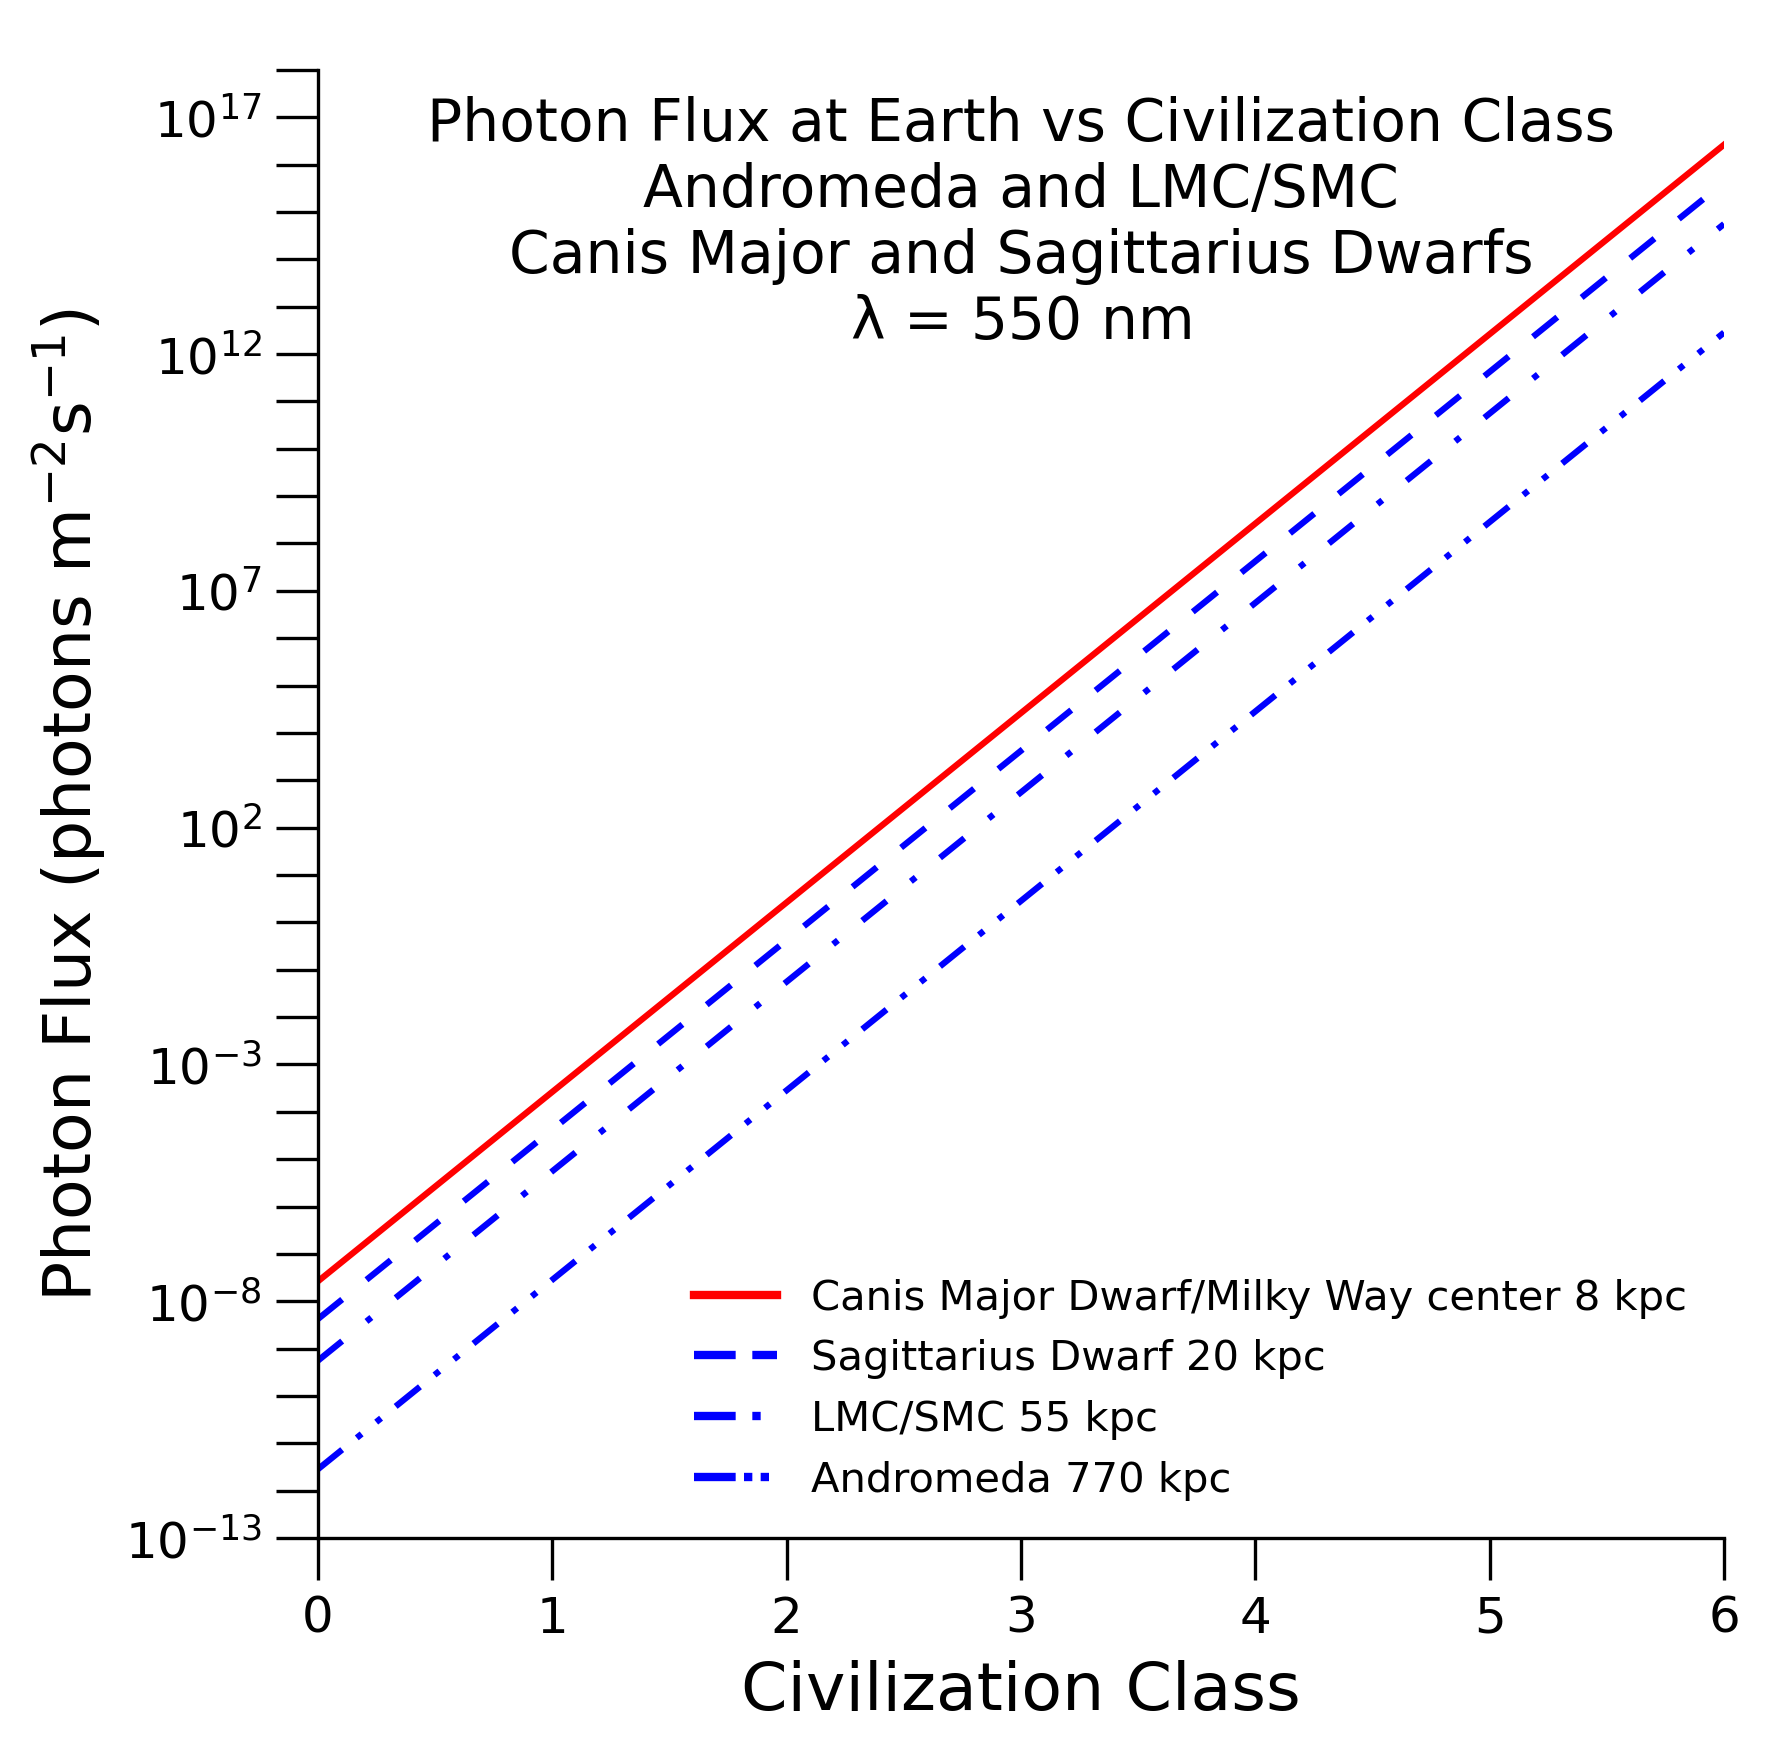

In [169]:
classes = np.linspace(0, 6, 1000)

fig, ax = plt.subplots(figsize=(6,6), dpi=300)

plt.plot(classes, get_fluxP(classes, wavelength, 8*u.kpc), color='red', linestyle = '-', label='Canis Major Dwarf/Milky Way center 8 kpc')
plt.plot(classes, get_fluxP(classes, wavelength, 20*u.kpc), color='blue', linestyle = (0, (5, 5)), label='Sagittarius Dwarf 20 kpc')
plt.plot(classes, get_fluxP(classes, wavelength, 55*u.kpc), color='blue', linestyle = (0, (5, 5, 1, 5)), label='LMC/SMC 55 kpc')
plt.plot(classes, get_fluxP(classes, wavelength, 770*u.kpc), color='blue', linestyle = (0, (5, 3, 1, 3, 1, 3)), label='Andromeda 770 kpc')

plt.title(r"""
Photon Flux at Earth vs Civilization Class
Andromeda and LMC/SMC
Canis Major and Sagittarius Dwarfs
$\lambda$ = 550 nm""",
loc='center', y=0.8, fontsize=14)
plt.ylabel(r"Photon Flux (photons $m^{{-2}} s^{{-1}}$)", fontsize=16)
plt.xlabel("Civilization Class", fontsize=16)

custom_handles = [
    Line2D([0], [0], color='red', lw=2, linestyle='-', label='Canis Major Dwarf/Milky Way center 8 kpc'),
    Line2D([0], [0], color='blue', lw=2, linestyle=(0, (5, 2)), label='Sagittarius Dwarf 20 kpc'),
    Line2D([0], [0], color='blue', lw=2, linestyle=(0, (5, 2, 1, 2)), label='LMC/SMC 55 kpc'),
    Line2D([0], [0], color='blue', lw=2, linestyle=(0, (5, 1, 1, 1, 1, 3)), label='Andromeda 770 kpc'),
]

# plt.figlegend(handles=custom_handles, loc='upper center', bbox_to_anchor=(0.5, 0), frameon=True, framealpha=1, edgecolor='black', fontsize=13)
plt.legend(handles=custom_handles, frameon=False, loc='lower right', fontsize=10)

# Customize axis styles
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add ticks for every order of magnitude and labels for every other
ax.set_yscale('log')

ylims = plt.gca().get_ylim()
y_ticks = [10**i for i in range(int(np.floor(np.log10(ylims[0]))), int(np.ceil(np.log10(ylims[1])) + 1))]
ax.set_yticks(y_ticks)

for i, label in enumerate(ax.yaxis.get_ticklabels()):
    label.set_visible(i % 5 == 0)
    
plt.tick_params('both', length=10, which='major')

plt.xlim(0, 6)
plt.tight_layout()
plt.show()

# Figure 2
Spot dwell time vs distance. Lines are plotted for various civilization classes. Figure adapted with permission from Lubin (2016).

The dwell time $\tau_\text{dwell}$—how long a blindly transmitted beam would be visible on Earth—is the spot time divided by the relative transverse speed of the transmitter $V_t$
\begin{align}
\tau_\text{dwell} = \frac{s}{V_t} = \frac{2L\lambda} {10^SV_t}, 
\end{align}
Using a typical transverse speed relative to Earth of 100 km/s to 1000 km/s, the dwell time bounds are $2 \times 10^6$ s to $4 \times 10^7$ s (see Lubin 2016).

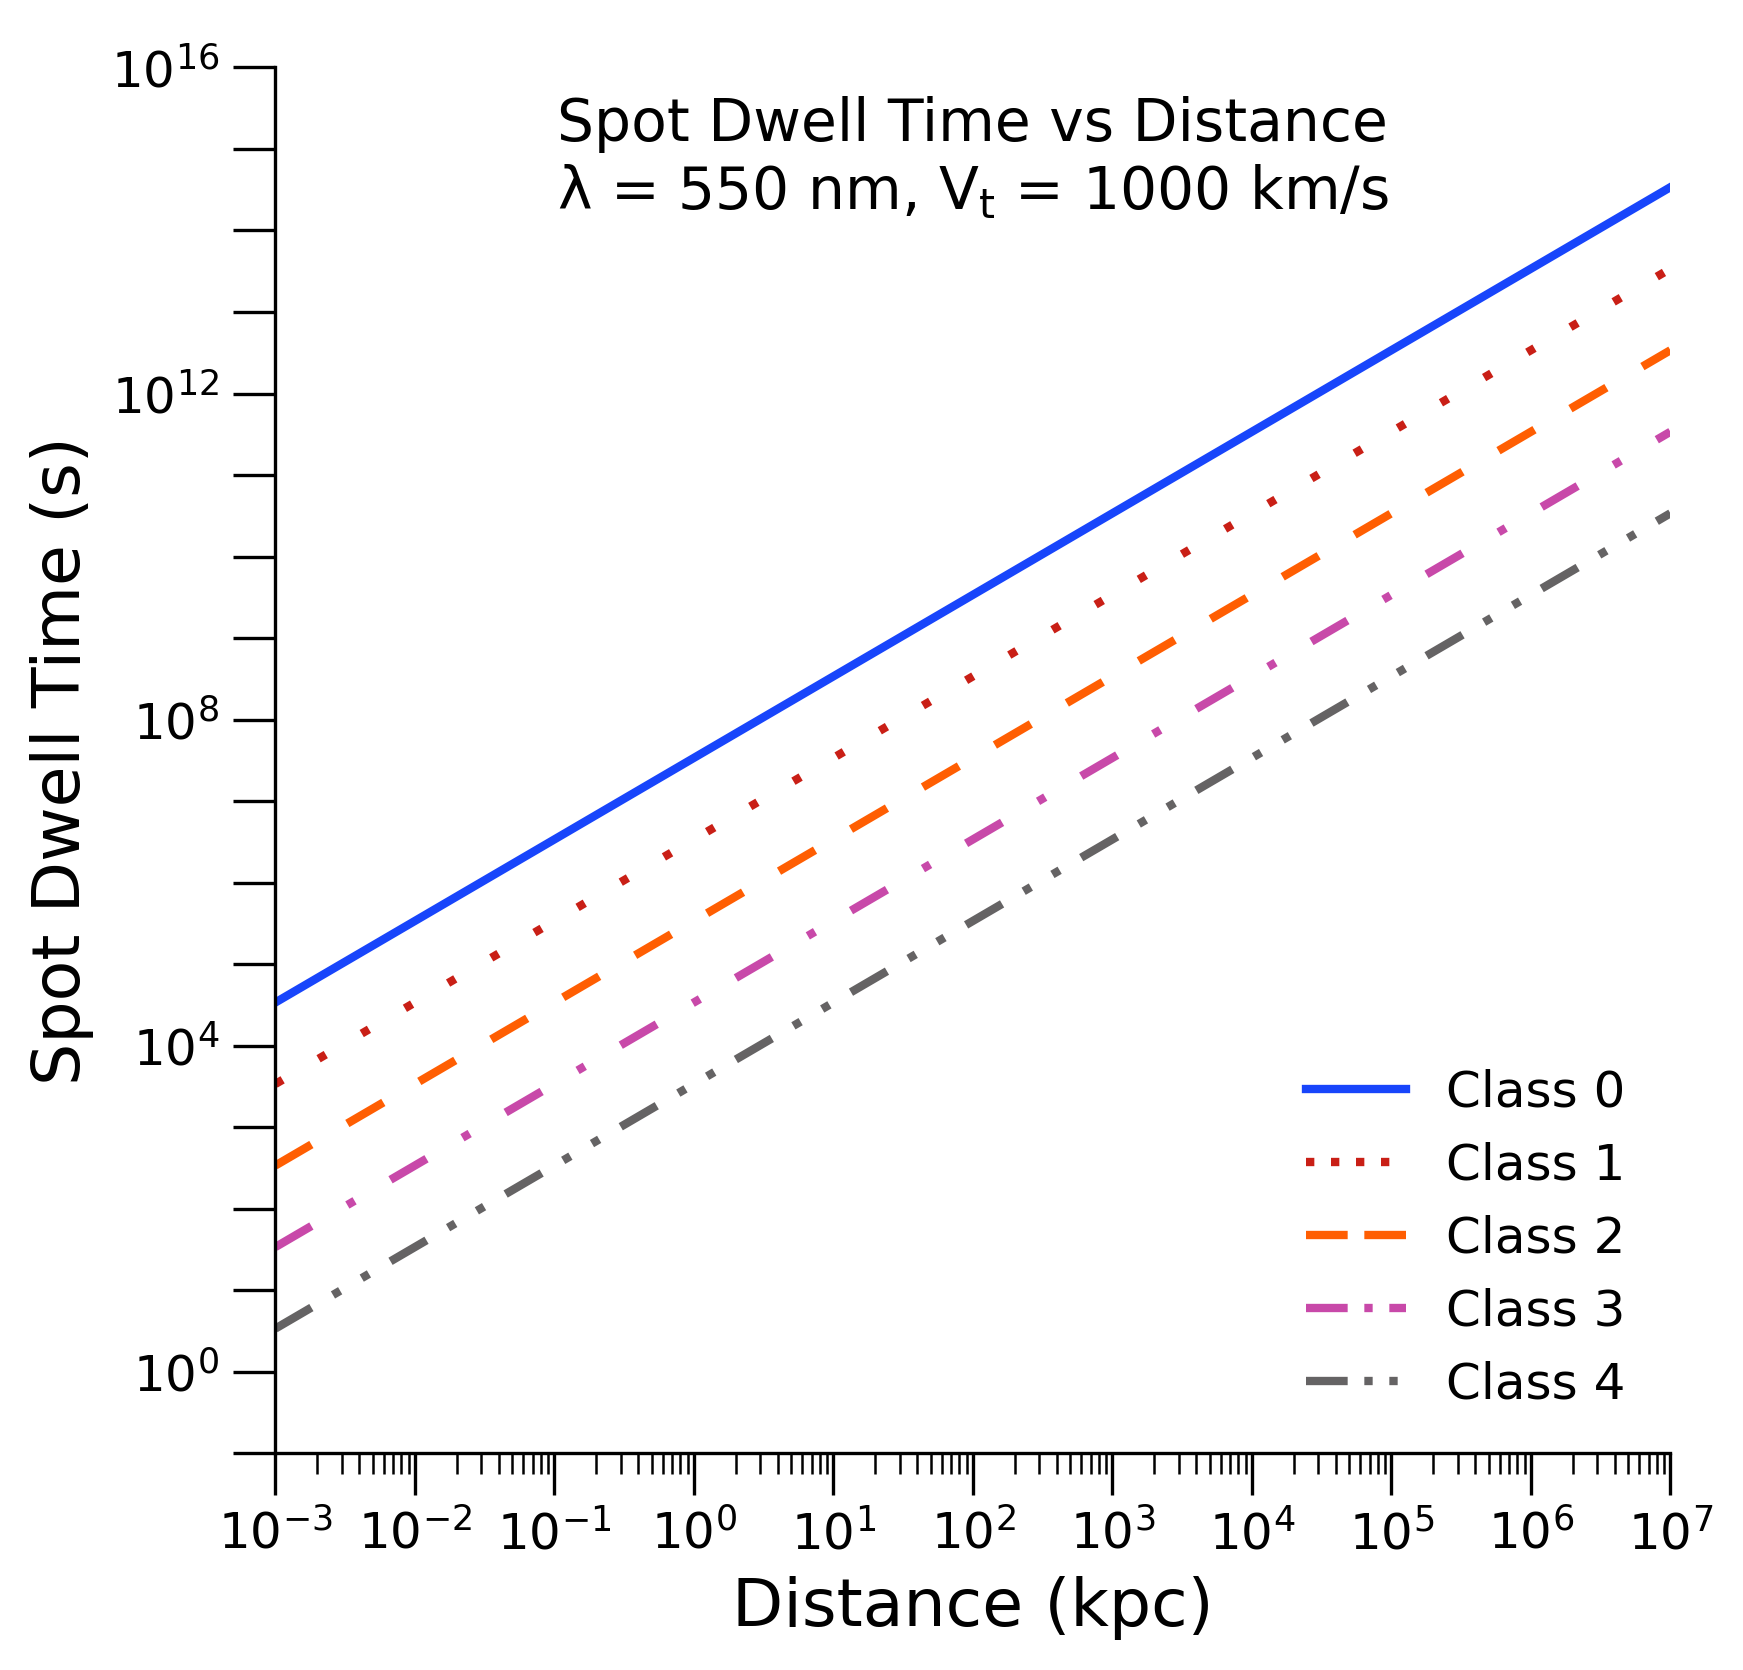

In [170]:
def get_dwell_time(S, wavelength, L, V_t=1000*u.km/u.s):
    """
    Calculates the dwell time of a spot on Earth.
    Args:
    - S: Civilization class.
    - wavelength: Laser wavelength.
    - L: Distance to the transmitter.
    - V_t: Relative transverse velocity of the transmitter.
    """
    return (2*L*wavelength /(V_t*10**S*u.m)).to(u.s) #returns the dwell time in seconds

dist = np.logspace(-3, 7, 1000) * u.kpc # Distance range in up to 10^10 kpc

fig, ax = plt.subplots(figsize=(6,6), dpi=300)
plt.plot(dist, get_dwell_time(0, wavelength, dist), color=colors[0], label='Class 0', linewidth=2, linestyle='-')
plt.plot(dist, get_dwell_time(1, wavelength, dist), color=colors[1], label='Class 1', linewidth=2, linestyle=(0, (1, 5)))
plt.plot(dist, get_dwell_time(2, wavelength, dist), color=colors[2], label='Class 2', linewidth=2, linestyle=(0, (5, 5)))
plt.plot(dist, get_dwell_time(3, wavelength, dist), color=colors[3], label='Class 3', linewidth=2, linestyle=(0, (5, 5, 1, 5)))
plt.plot(dist, get_dwell_time(4, wavelength, dist), color=colors[4], label='Class 4', linewidth=2, linestyle=(0, (5, 3, 1, 3, 1, 3)))

plt.title(r"""
Spot Dwell Time vs Distance
$\lambda$ = 550 nm, $V_t$ = 1000 km/s""",
y=0.88, fontsize=14)

plt.xscale('log')
plt.yscale('log')

x_ticks = [10**i for i in range(-3, 8)]
ax.set_xticks(x_ticks)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ylims = plt.gca().get_ylim()
y_ticks = [10**i for i in range(int(np.floor(np.log10(ylims[0]))), int(np.ceil(np.log10(ylims[1])) + 1))]
ax.set_yticks(y_ticks)

for i, label in enumerate(ax.yaxis.get_ticklabels()):
    label.set_visible((i-1) % 4 == 0)

ax.tick_params(axis='x', which='minor', length=5)
ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=20))

plt.tick_params('both', length=10, which='major')
plt.tick_params('both', length=5, which='minor')

plt.xlim(1e-3, 1e7)
plt.xlabel("Distance (kpc)", fontsize=16)
plt.ylabel("Spot Dwell Time (s)", fontsize=16)

custom_handles = [
    Line2D([0], [0], color=colors[0], lw=2, linestyle='-', label='Class 0'),
    Line2D([0], [0], color=colors[1], lw=2, linestyle=(0, (1, 2)), label='Class 1'),
    Line2D([0], [0], color=colors[2], lw=2, linestyle=(0, (5, 2)), label='Class 2'),
    Line2D([0], [0], color=colors[3], lw=2, linestyle=(0, (5, 2, 1, 2)), label='Class 3'),
    Line2D([0], [0], color=colors[4], lw=2, linestyle=(0, (5, 2, 1, 2, 1, 3)), label='Class 4')
]
plt.legend(handles=custom_handles, loc='lower right', frameon=False, fontsize=12)
plt.show()

# Unused Figure 2
For DE-star's baseline wavelength of 1.06 μm:

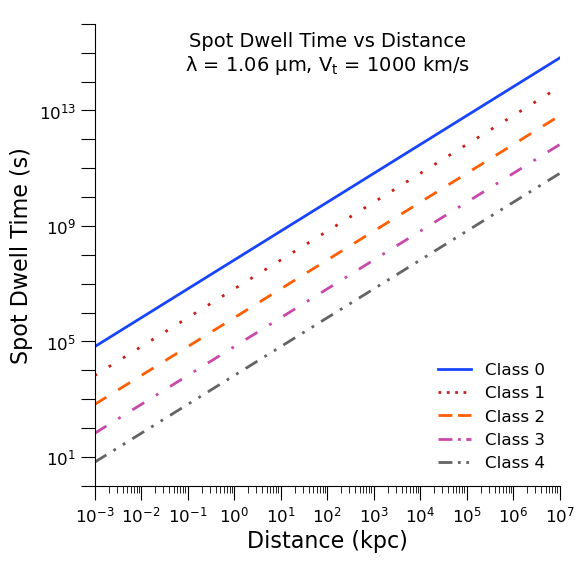

In [171]:
def get_dwell_time(S, wavelength, L, V_t=1000*u.km/u.s):
    """
    Calculates the dwell time of a spot on Earth.
    Args:
    - S: Civilization class.
    - wavelength: Laser wavelength.
    - L: Distance to the transmitter.
    - V_t: Relative transverse velocity of the transmitter.
    """
    return (2*L*wavelength /(V_t*10**S*u.m)).to(u.s) #returns the dwell time in seconds

wavelength_b = 1.06 *u.um #DE-STAR baseline wavelength

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(dist, get_dwell_time(0, wavelength_b, dist), color=colors[0], label='Class 0', linewidth=2, linestyle='-')
plt.plot(dist, get_dwell_time(1, wavelength_b, dist), color=colors[1], label='Class 1', linewidth=2, linestyle=(0, (1, 5)))
plt.plot(dist, get_dwell_time(2, wavelength_b, dist), color=colors[2], label='Class 2', linewidth=2, linestyle=(0, (5, 5)))
plt.plot(dist, get_dwell_time(3, wavelength_b, dist), color=colors[3], label='Class 3', linewidth=2, linestyle=(0, (5, 5, 1, 5)))
plt.plot(dist, get_dwell_time(4, wavelength_b, dist), color=colors[4], label='Class 4', linewidth=2, linestyle=(0, (5, 3, 1, 3, 1, 3)))

plt.title(r"""
Spot Dwell Time vs Distance
$\lambda$ = 1.06 $\mu$m, $V_t$ = 1000 km/s""",
y=0.88, fontsize=14)

plt.xscale('log')
plt.yscale('log')

x_ticks = [10**i for i in range(-3, 8)]
ax.set_xticks(x_ticks)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ylims = plt.gca().get_ylim()
y_ticks = [10**i for i in range(int(np.floor(np.log10(ylims[0]))), int(np.ceil(np.log10(ylims[1])) + 1))]
ax.set_yticks(y_ticks)

for i, label in enumerate(ax.yaxis.get_ticklabels()):
    label.set_visible((i-1) % 4 == 0)

ax.tick_params(axis='x', which='minor', length=5)
ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=20))

plt.tick_params('both', length=10, which='major')
plt.tick_params('both', length=5, which='minor')

plt.xlim(1e-3, 1e7)
plt.xlabel("Distance (kpc)", fontsize=16)
plt.ylabel("Spot Dwell Time (s)", fontsize=16)

custom_handles = [
    Line2D([0], [0], color=colors[0], lw=2, linestyle='-', label='Class 0'),
    Line2D([0], [0], color=colors[1], lw=2, linestyle=(0, (1, 2)), label='Class 1'),
    Line2D([0], [0], color=colors[2], lw=2, linestyle=(0, (5, 2)), label='Class 2'),
    Line2D([0], [0], color=colors[3], lw=2, linestyle=(0, (5, 2, 1, 2)), label='Class 3'),
    Line2D([0], [0], color=colors[4], lw=2, linestyle=(0, (5, 2, 1, 2, 1, 3)), label='Class 4')
]
plt.legend(handles=custom_handles, loc='lower right', frameon=False, fontsize=12)
plt.show()

# Simplified Figure 3

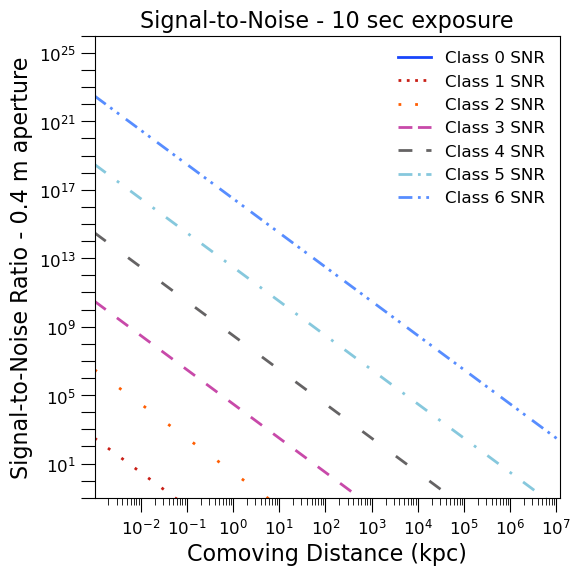

In [172]:
dist = np.logspace(-3, 7.07, 1000) * u.kpc

SNR_S0 = SigNoise(fluxW_to_mag(get_fluxW(0, wavelength, dist)))
SNR_S1 = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, dist)))
SNR_S2 = SigNoise(fluxW_to_mag(get_fluxW(2, wavelength, dist)))
SNR_S3 = SigNoise(fluxW_to_mag(get_fluxW(3, wavelength, dist)))
SNR_S4 = SigNoise(fluxW_to_mag(get_fluxW(4, wavelength, dist)))
SNR_S5 = SigNoise(fluxW_to_mag(get_fluxW(5, wavelength, dist)))
SNR_S6 = SigNoise(fluxW_to_mag(get_fluxW(6, wavelength, dist)))

fig, ax = plt.subplots(figsize=(6,6))

plt.plot(dist, SNR_S0, linewidth=2, linestyle='-', color=colors[0], label='SNR Class 0')
plt.plot(dist, SNR_S1, linewidth=2, linestyle=(0, (1, 5)), color=colors[1], label='SNR Class 1')
plt.plot(dist, SNR_S2, linewidth=2, linestyle=(0, (1, 10)), color=colors[2], label='SNR Class 2')
plt.plot(dist, SNR_S3, linewidth=2, linestyle=(0, (5, 5)), color=colors[3], label='SNR Class 3')
plt.plot(dist, SNR_S4, linewidth=2, linestyle=(0, (5, 10)), color=colors[4], label='SNR Class 4')
plt.plot(dist, SNR_S5, linewidth=2, linestyle=(0, (5, 5, 1, 5)), color=colors[5], label='SNR Class 5')
plt.plot(dist, SNR_S6, linewidth=2, linestyle=(0, (5, 2, 1, 2, 1, 3)), color=colors[6], label='SNR Class 6')

plt.title('Signal-to-Noise - 10 sec exposure', fontsize=16)
plt.ylabel("Signal-to-Noise Ratio - 0.4 m aperture", fontsize=16)
plt.xlabel("Comoving Distance (kpc)", fontsize=16)

custom_handles = [
    Line2D([0], [0], color=colors[0], lw=2, linestyle='-', label='Class 0 SNR'),
    Line2D([0], [0], color=colors[1], lw=2, linestyle=(0, (1, 2)), label='Class 1 SNR'),
    Line2D([0], [0], color=colors[2], lw=2, linestyle=(0, (1, 5)), label='Class 2 SNR'),    
    Line2D([0], [0], color=colors[3], lw=2, linestyle=(0, (5, 2)), label='Class 3 SNR'),
    Line2D([0], [0], color=colors[4], lw=2, linestyle=(0, (5, 5)), label='Class 4 SNR'),    
    Line2D([0], [0], color=colors[5], lw=2, linestyle=(0, (5, 2, 1, 2)), label='Class 5 SNR'),
    Line2D([0], [0], color=colors[6], lw=2, linestyle=(0, (5, 2, 1, 2, 1, 3)), label='Class 6 SNR')
]
plt.legend(handles=custom_handles, loc='upper right', frameon=False, fontsize=12)

plt.xscale('log')
ax.set_yscale('log')

ylims = (1e-1, 1e26)
plt.xlim(dist.value.min(), dist.value.max())

plt.ylim(ylims)
plt.tick_params('both', length=10, which='major')
plt.tick_params('both', length=5, which='minor')

y_ticks = [float(10**i) for i in range(int(np.floor(np.log10(ylims[0]))), int(np.ceil(np.log10(ylims[1])) + 1))]
ax.set_yticks(y_ticks)

for i, label in enumerate(ax.yaxis.get_ticklabels()):
    label.set_visible((i-2) % 4 == 0)

x_ticks = [10**i for i in range(-2, 8)]
ax.set_xticks(x_ticks)
ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=20))

plt.show()

# Unused Figure 
Simplified figure 3 not accounting for the effects of reshift on flux and signal to noise.

In [173]:
# Assuming SigNoise, fluxW_to_mag, and get_fluxW are defined elsewhere
dist = np.logspace(-3, 7.07, 1000) * u.kpc  

SNR_S0 = SigNoise(fluxW_to_mag(get_fluxW(0, wavelength, dist)))
SNR_S1 = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, dist)))
SNR_S2 = SigNoise(fluxW_to_mag(get_fluxW(2, wavelength, dist)))
SNR_S3 = SigNoise(fluxW_to_mag(get_fluxW(3, wavelength, dist)))
SNR_S4 = SigNoise(fluxW_to_mag(get_fluxW(4, wavelength, dist)))
SNR_S5 = SigNoise(fluxW_to_mag(get_fluxW(5, wavelength, dist)))
SNR_S6 = SigNoise(fluxW_to_mag(get_fluxW(6, wavelength, dist)))

## Y axis equivalents for other aperture sizes
SNR_04m = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, L)))
SNR_1m = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, L)))
SNR_10m = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, L)))
SNR_30m = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, L)))

SNR_10m /= SNR_1m #just a scalar value, isn't that wonderful!
SNR_30m /= SNR_1m
SNR_04m /= SNR_1m

A_scale = [1, SNR_10m, SNR_30m, SNR_04m]

print(f"""
SNR ∝ A^0.5 in the time-dependent noise dominated regime:
The ratio of the SNR for a 0.4 m aperture to the SNR for a 1m aperture is {SNR_04m:.1f}.
The ratio of the SNR for a 10 m aperture to the SNR for a 1m aperture is {SNR_10m:.1f}.
The ratio of the SNR for a 30 m aperture to the SNR for a 1m aperture is {SNR_30m:.1f}.
""")

ylims = (1e1, 1e24)

## X axis cosmology
LambdaCDM = FlatLambdaCDM(H0=67.4 * u.km / u.s / u.Mpc, Om0=0.315, Tcmb0= Planck18.Tcmb0, Neff=Planck18.Neff, m_nu=Planck18.m_nu, Ob0=0.0493) #Make some updates from Planck 2020

# Define conversion functions
def z_to_kpc(x):
    """
    Convert redshift to comoving distance in kpc.
    """
    z = x * cu.redshift
    d = np.empty(z.shape)
    mask = z < 0.2e-5 * cu.redshift
    d[mask] = (const.c * z[mask] / LambdaCDM.H0).to(u.kpc).decompose().value  # Linear approximation for small redshifts
    d[~mask] = LambdaCDM.comoving_distance(z[~mask]).to(u.kpc).value  # Full calculation for larger redshifts
    return LambdaCDM.comoving_distance(z).to(u.kpc).value

def kpc_to_z(x):
    """
    Convert comoving distance in kpc to redshift.
    Handles small distances with a linear approximation.
    """
    d = x * u.kpc
    z = np.empty(d.shape)  # Initialize array for redshift
    mask = d < 0.1 * u.Mpc
    z[mask] = (LambdaCDM.H0 * d[mask] / const.c).decompose().value     # Linear approximation for small distances
    z[~mask] = [z_at_value(LambdaCDM.comoving_distance, dist) for dist in d[~mask]]
    return z


SNR ∝ A^0.5 in the time-dependent noise dominated regime:
The ratio of the SNR for a 0.4 m aperture to the SNR for a 1m aperture is 1.0.
The ratio of the SNR for a 10 m aperture to the SNR for a 1m aperture is 1.0.
The ratio of the SNR for a 30 m aperture to the SNR for a 1m aperture is 1.0.



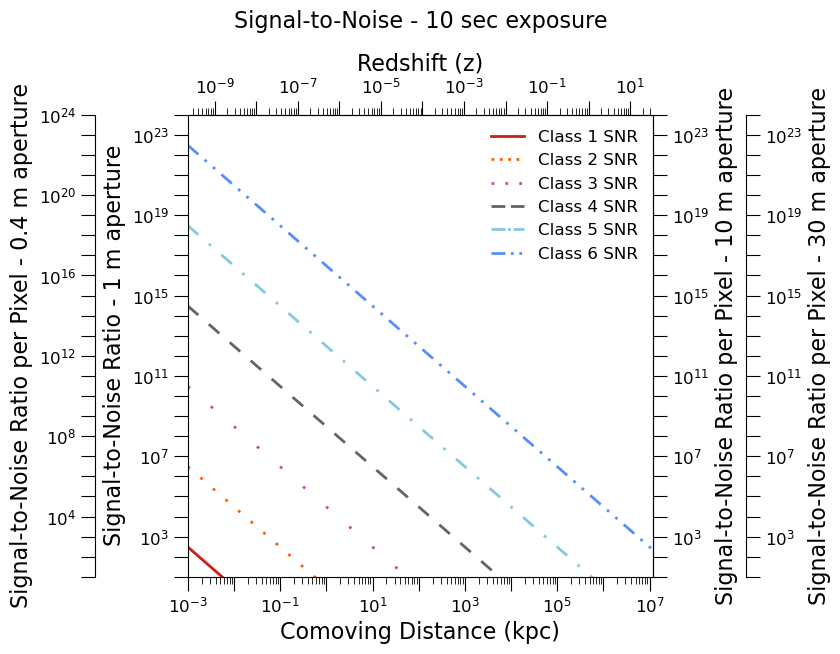

In [174]:
fig, ax1 = plt.subplots(figsize=(6, 6), dpi=100)

## Plotting SNR vs. Distance
# plt.plot(dist, SNR_S0, label='SNR Class 0', color=colors[0], linewidth=2, linestyle='-')
plt.plot(dist, SNR_S1, label='SNR Class 1', color=colors[1], linewidth=2, linestyle='-')
plt.plot(dist, SNR_S2, label='SNR Class 2', color=colors[2], linewidth=2, linestyle=(0, (1, 5)))
plt.plot(dist, SNR_S3, label='SNR Class 3', color=colors[3], linewidth=2, linestyle=(0, (1, 10)))
plt.plot(dist, SNR_S4, label='SNR Class 4', color=colors[4], linewidth=2, linestyle=(0, (5, 5)))
plt.plot(dist, SNR_S5, label='SNR Class 5', color=colors[5], linewidth=2, linestyle=(0, (5, 5, 1, 5)))
plt.plot(dist, SNR_S6, label='SNR Class 6', color=colors[6], linewidth=2, linestyle=(0, (5, 3, 1, 3, 1, 3)))

## General plot settings
plt.title('Signal-to-Noise - 10 sec exposure', fontsize=16, y=1.17)
plt.xlabel("Comoving Distance (kpc)", fontsize=16)
plt.xscale('log')
plt.yscale('log')

## Custom Legend
custom_handles = [
    # Line2D([0], [0], color=colors[0], lw=2, linestyle='-', label='Class 0 SNR'),
    Line2D([0], [0], color=colors[1], lw=2, linestyle='-', label='Class 1 SNR'),
    Line2D([0], [0], color=colors[2], lw=2, linestyle=(0, (1, 2, 1, 2, 1, 2, 1, 5)), label='Class 2 SNR'),    
    Line2D([0], [0], color=colors[3], lw=2, linestyle=(0, (1, 4)), label='Class 3 SNR'),
    Line2D([0], [0], color=colors[4], lw=2, linestyle=(0, (5, 2)), label='Class 4 SNR'),    
    Line2D([0], [0], color=colors[5], lw=2, linestyle=(0, (5, 1, 1, 1)), label='Class 5 SNR'),
    Line2D([0], [0], color=colors[6], lw=2, linestyle=(0, (5, 2, 1, 2, 1, 3)), label='Class 6 SNR')
]
plt.legend(handles=custom_handles, loc='upper right', frameon=False, fontsize=12)

## Axes settings
locator = LogLocator(base=10.0, numticks=30)  # Adjust numticks for desired range
x_ticks = [float(10**i) for i in range(int(np.floor(np.log10(dist.value.min()))), int(np.ceil(np.log10(dist.value.max())) + 1))]
ax1.set_xticks(x_ticks)
ax1.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=20))
plt.xlim(dist.value.min(), dist.value.max())
plt.ylim(ylims)
ax1.tick_params('x', length=10, which='major')
ax1.tick_params('x', length=5, which='minor')

ax2 = ax1.secondary_yaxis('right', functions=(lambda SNR: SNR*SNR_10m, lambda SNR: SNR/SNR_10m))
ax3 = ax1.secondary_yaxis(1.2, functions=(lambda SNR: SNR*SNR_30m, lambda SNR: SNR/SNR_30m))
ax4 = ax1.secondary_yaxis(-0.2, functions=(lambda SNR: SNR*SNR_04m, lambda SNR: SNR/SNR_04m))

# Adjust position of new axes to prevent overlap
ax3.spines['right'].set_position(('axes', 1.2))  # Move the third axis further to the right
ax4.spines['left'].set_position(('axes', -0.2))  # Move the fourth axis to the left

axes = [ax1, ax2, ax3, ax4]

for j, ax in enumerate(axes):
    ax.tick_params('y', length=10, which='major')
    ax.tick_params('y', length=5, which='minor')

    ax_lims = A_scale[j]*ylims
    ax_ticks = [float(10**i) for i in range(int(np.floor(np.log10(ax_lims[0]))), int(np.ceil(np.log10(ax_lims[1])) + 1))]
    ax.set_yticks(ax_ticks)

    for i, label in enumerate(ax.yaxis.get_ticklabels()):
        if j == 3:
            label.set_visible((i+1) % 4 == 0)
        else:
            label.set_visible((i+2) % 4 == 0)


ax1.set_ylabel("Signal-to-Noise Ratio - 1 m aperture", fontsize=16)
ax2.set_ylabel("Signal-to-Noise Ratio per Pixel - 10 m aperture", fontsize=16)
ax3.set_ylabel("Signal-to-Noise Ratio per Pixel - 30 m aperture", fontsize=16)
ax4.set_ylabel("Signal-to-Noise Ratio per Pixel - 0.4 m aperture", fontsize=16)

## Add x-axis for redshift
secax = ax1.secondary_xaxis('top', functions=(kpc_to_z, z_to_kpc))
secax.set_xlabel('Redshift (z)', fontsize=16)
secax.set_xscale('log') # Example scale

secax_ticks = [10**i for i in range(-9, 2)]
secax.set_xticks(secax_ticks)

secax.minorticks_on()
secax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=20))

secax.tick_params('x', length=10, which='major')
secax.tick_params('x', length=5, which='minor')

for ax in (ax1, secax):
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        label.set_visible(i % 2 == 0)

plt.show()

# Figure 3

Signal-to-noise vs. distance while varying civilization class and aperture size. At high redshifts, the flux scales as $(1+z)^{-2}$, due to the combined effects of redshift and the reduced photon arrival rate. Using the scales, we can determine the minimum civilization class that can be detected for a given distance and aperture size. We adopt the ΛCDM model and LCO 0.4m parameters as listed in Table 1 but vary aperture size. Since only a single pulse will be received under the intelligent targeting assumption, the integration time affects the noise but not the signal. Our typical integration time per image is 10 s which decreases time-dependent noise by a factor of 100. We plot 1000 s integration time to emphasize that even relatively long integration (exposure) times yield large SNR. Figure adapted with permission from Lubin (2016).

We choose to 

In [175]:
def SigNoise_z(M, z, M_b=21*u.ABmag, A=SBIG_A, e=0.5, Q=0.5*u.ct/u.photon, t=10*u.s, t_p=None, N_r=14.5*u.ct, i_DC=0.03*u.ct/u.s, Omega=FWHM):
    """
    Calculates the signal-to-noise ratio of a source.
    Args:
    - M: Magnitude of the source.
    - M_b: Background magnitude.
    - A: Area of the detector.
    - e: Efficiency of the detector.
    - Q: Quantum efficiency of the detector.
    - t: Integration time.
    - t_p: duration of the pulse (if not equal to the integration time)
    - N_r: Readout noise.
    - i_DC: Dark current.
    - Omega: Beam divergence solid angle.
    """
    if t_p is None:
        t_p = t
    A_e = A*e*Q
    F = mag_to_fluxP(M)/(1+z)**2 # Accounting for how the wavelength is redshifted and time dilation each decrease flux by the scale factor.
    F_b = mag_to_fluxP(M_b)/((1+z)*u.arcsec)**2 #This mandates the background mag be gived in mag/arcsec^2
    SN = ((F*A_e*t_p)/(N_r**2+t*(i_DC+F_b*A_e*Omega)*u.ct)**.5).to(1) #u.ct and u.ct^2 can be added because the variance of the poisson distribution equals the mean
    return SN

z = kpc_to_z(dist.value)

A_e = SBIG_A*0.25*u.ct/u.photon #Effective area of the telescope
F_b = mag_to_fluxP(21*u.ABmag)/((1+z)*u.arcsec)**2 #Background flux

print(f"""
The impact of redshifting the background flux is small since we are in the readout noise dominated regime. This choice would be significant for a quantum limited detector.
Readout noise counts:          {14.5*u.ct}
Dark current counts:           {0.3*u.ct}
Background flux counts at z=0: {((10*u.s*(F_b*A_e*FWHM)*u.ct)**.5)[0]}
Background flux counts at z=1: {((10*u.s*(F_b*A_e*FWHM)*u.ct)**.5)[0]/4}
""")

z= kpc_to_z(dist.value)
SNR_z_S0 = SigNoise_z(fluxW_to_mag(get_fluxW(0, wavelength, dist)), z=z)
SNR_z_S1 = SigNoise_z(fluxW_to_mag(get_fluxW(1, wavelength, dist)), z=z)
SNR_z_S2 = SigNoise_z(fluxW_to_mag(get_fluxW(2, wavelength, dist)), z=z)
SNR_z_S3 = SigNoise_z(fluxW_to_mag(get_fluxW(3, wavelength, dist)), z=z)
SNR_z_S4 = SigNoise_z(fluxW_to_mag(get_fluxW(4, wavelength, dist)), z=z)
SNR_z_S5 = SigNoise_z(fluxW_to_mag(get_fluxW(5, wavelength, dist)), z=z)
SNR_z_S6 = SigNoise_z(fluxW_to_mag(get_fluxW(6, wavelength, dist)), z=z)

SNRs_z = [SNR_z_S0, SNR_z_S1, SNR_z_S2, SNR_z_S3, SNR_z_S4, SNR_z_S5, SNR_z_S6]


The impact of redshifting the background flux is small since we are in the readout noise dominated regime. This choice would be significant for a quantum limited detector.
Readout noise counts:          14.5 ct
Dark current counts:           0.3 ct
Background flux counts at z=0: 9.532907910173552 ct
Background flux counts at z=1: 2.383226977543388 ct



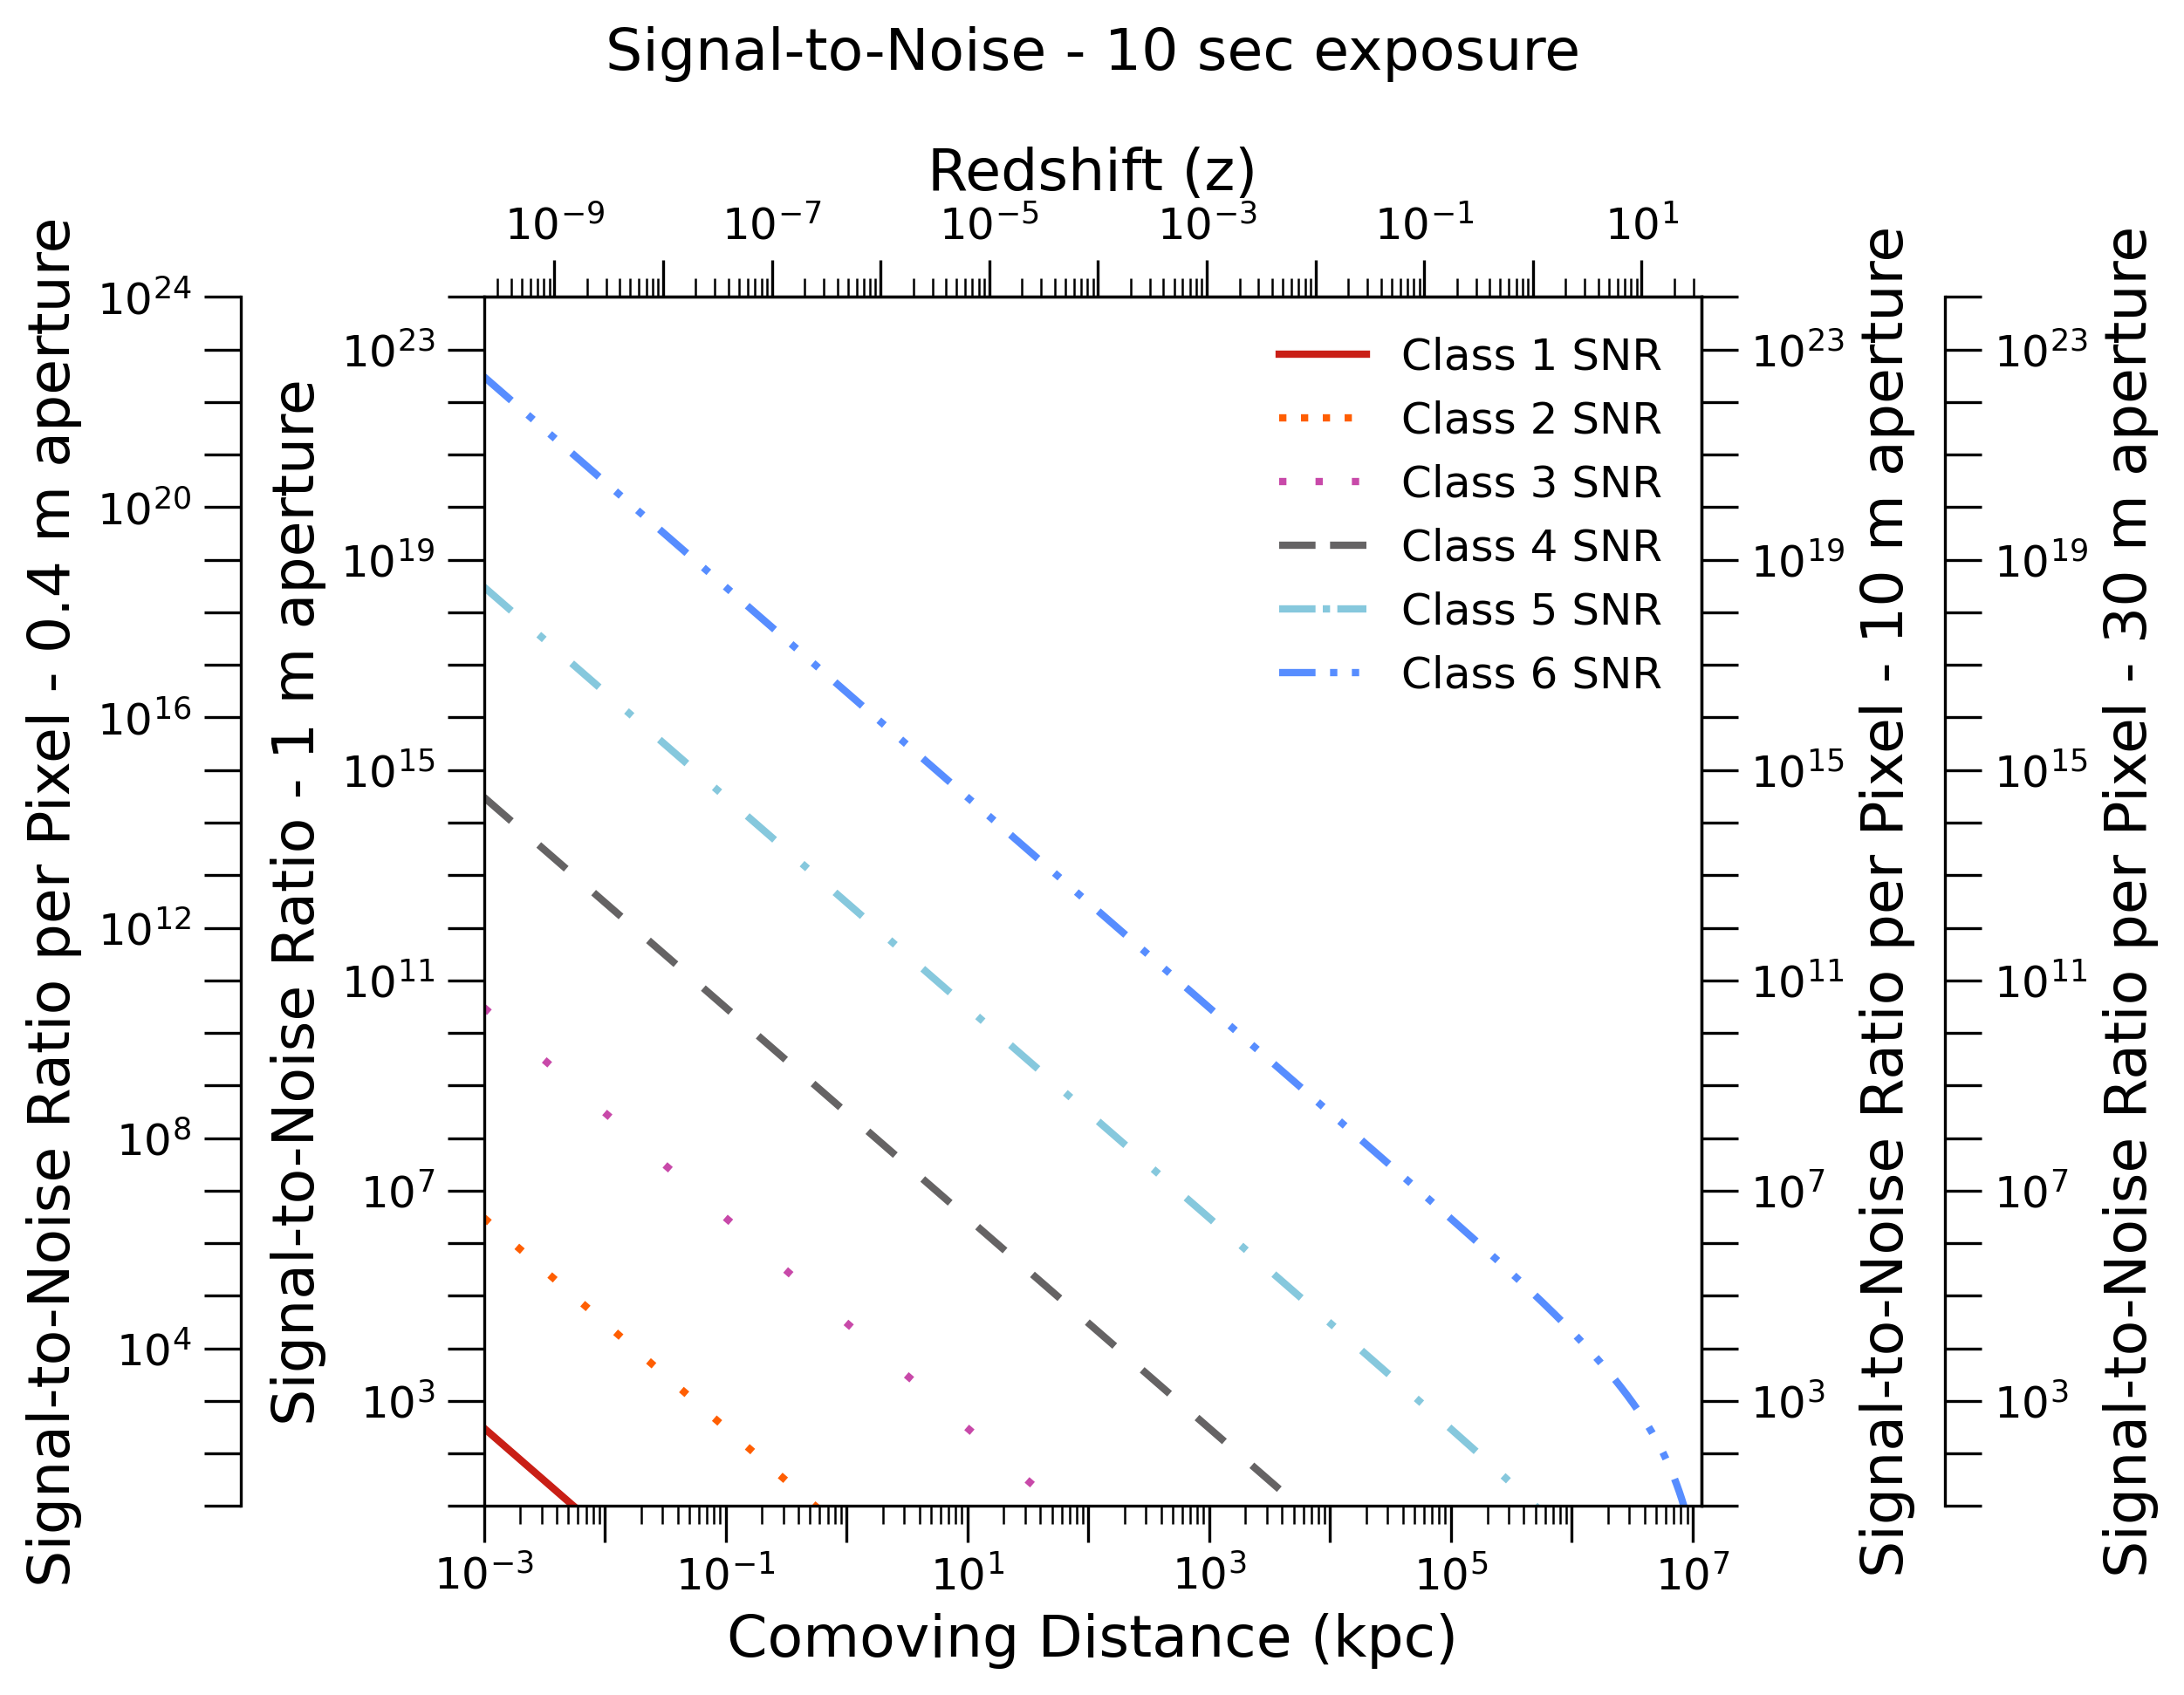

In [176]:
fig, ax1 = plt.subplots(figsize=(6, 6), dpi=300)

## Plotting SNR vs. Distance
# plt.plot(dist, SNRs_z[0], label='SNR Class 0', color=colors[0], linewidth=2, linestyle='-')
plt.plot(dist, SNRs_z[1], label='SNR Class 1', color=colors[1], linewidth=2, linestyle='-')
plt.plot(dist, SNRs_z[2], label='SNR Class 2', color=colors[2], linewidth=2, linestyle=(0, (1, 5)))
plt.plot(dist, SNRs_z[3], label='SNR Class 3', color=colors[3], linewidth=2, linestyle=(0, (1, 10)))
plt.plot(dist, SNRs_z[4], label='SNR Class 4', color=colors[4], linewidth=2, linestyle=(0, (5, 5)))
plt.plot(dist, SNRs_z[5], label='SNR Class 5', color=colors[5], linewidth=2, linestyle=(0, (5, 5, 1, 5)))
plt.plot(dist, SNRs_z[6], label='SNR Class 6', color=colors[6], linewidth=2, linestyle=(0, (5, 3, 1, 3, 1, 3)))

## General plot settings
plt.title('Signal-to-Noise - 10 sec exposure', fontsize=16, y=1.17)
plt.xlabel("Comoving Distance (kpc)", fontsize=16)
plt.xscale('log')
plt.yscale('log')

## Custom Legend
custom_handles = [
    # Line2D([0], [0], color=colors[0], lw=2, linestyle='-', label='Class 0 SNR'),
    Line2D([0], [0], color=colors[1], lw=2, linestyle='-', label='Class 1 SNR'),
    Line2D([0], [0], color=colors[2], lw=2, linestyle=(0, (1, 2, 1, 2, 1, 2, 1, 5)), label='Class 2 SNR'),    
    Line2D([0], [0], color=colors[3], lw=2, linestyle=(0, (1, 4)), label='Class 3 SNR'),
    Line2D([0], [0], color=colors[4], lw=2, linestyle=(0, (5, 2)), label='Class 4 SNR'),    
    Line2D([0], [0], color=colors[5], lw=2, linestyle=(0, (5, 1, 1, 1)), label='Class 5 SNR'),
    Line2D([0], [0], color=colors[6], lw=2, linestyle=(0, (5, 2, 1, 2, 1, 3)), label='Class 6 SNR')
]
plt.legend(handles=custom_handles, loc='upper right', frameon=False, fontsize=12)

## Axes settings
locator = LogLocator(base=10.0, numticks=30)  # Adjust numticks for desired range
x_ticks = [float(10**i) for i in range(int(np.floor(np.log10(dist.value.min()))), int(np.ceil(np.log10(dist.value.max())) + 1))]
ax1.set_xticks(x_ticks)
ax1.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=20))
plt.xlim(dist.value.min(), dist.value.max())
plt.ylim(ylims)
ax1.tick_params('x', length=10, which='major')
ax1.tick_params('x', length=5, which='minor')

ax2 = ax1.secondary_yaxis('right', functions=(lambda SNR: SNR*SNR_10m, lambda SNR: SNR/SNR_10m))
ax3 = ax1.secondary_yaxis(1.2, functions=(lambda SNR: SNR*SNR_30m, lambda SNR: SNR/SNR_30m))
ax4 = ax1.secondary_yaxis(-0.2, functions=(lambda SNR: SNR*SNR_04m, lambda SNR: SNR/SNR_04m))

# Adjust position of new axes to prevent overlap
ax3.spines['right'].set_position(('axes', 1.2))  # Move the third axis further to the right
ax4.spines['left'].set_position(('axes', -0.2))  # Move the fourth axis to the left

axes = [ax1, ax2, ax3, ax4]

for j, ax in enumerate(axes):
    ax.tick_params('y', length=10, which='major')
    ax.tick_params('y', length=5, which='minor')

    ax_lims = A_scale[j]*ylims
    ax_ticks = [float(10**i) for i in range(int(np.floor(np.log10(ax_lims[0]))), int(np.ceil(np.log10(ax_lims[1])) + 1))]
    ax.set_yticks(ax_ticks)

    for i, label in enumerate(ax.yaxis.get_ticklabels()):
        if j == 3:
            label.set_visible((i+1) % 4 == 0)
        else:
            label.set_visible((i+2) % 4 == 0)


ax1.set_ylabel("Signal-to-Noise Ratio - 1 m aperture", fontsize=16)
ax2.set_ylabel("Signal-to-Noise Ratio per Pixel - 10 m aperture", fontsize=16)
ax3.set_ylabel("Signal-to-Noise Ratio per Pixel - 30 m aperture", fontsize=16)
ax4.set_ylabel("Signal-to-Noise Ratio per Pixel - 0.4 m aperture", fontsize=16)

## Add x-axis for redshift
secax = ax1.secondary_xaxis('top', functions=(kpc_to_z, z_to_kpc))
secax.set_xlabel('Redshift (z)', fontsize=16)
secax.set_xscale('log') # Example scale

secax_ticks = [10**i for i in range(-9, 2)]
secax.set_xticks(secax_ticks)

secax.minorticks_on()
secax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=20))

secax.tick_params('x', length=10, which='major')
secax.tick_params('x', length=5, which='minor')

for ax in (ax1, secax):
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        label.set_visible(i % 2 == 0)

plt.show()

In [177]:
# Assuming SigNoise, fluxW_to_mag, and get_fluxW are defined elsewhere
dist = np.logspace(-3, 6, 1000) * u.kpc

t_p = 1*u.ms #Milisecond pulse duration
SNR_S0p = SigNoise(fluxW_to_mag(get_fluxW(0, wavelength, dist)), A=np.pi*0.5**2*u.m**2, t=10*u.s, t_p=t_p)
SNR_S1p = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, dist)), A=np.pi*0.5**2*u.m**2, t=10*u.s, t_p=t_p)
SNR_S2p = SigNoise(fluxW_to_mag(get_fluxW(2, wavelength, dist)), A=np.pi*0.5**2*u.m**2, t=10*u.s, t_p=t_p)
SNR_S3p = SigNoise(fluxW_to_mag(get_fluxW(3, wavelength, dist)), A=np.pi*0.5**2*u.m**2, t=10*u.s, t_p=t_p)
SNR_S4p = SigNoise(fluxW_to_mag(get_fluxW(4, wavelength, dist)), A=np.pi*0.5**2*u.m**2, t=10*u.s, t_p=t_p)
SNR_S5p = SigNoise(fluxW_to_mag(get_fluxW(5, wavelength, dist)), A=np.pi*0.5**2*u.m**2, t=10*u.s, t_p=t_p)
SNR_S6p = SigNoise(fluxW_to_mag(get_fluxW(6, wavelength, dist)), A=np.pi*0.5**2*u.m**2, t=10*u.s, t_p=t_p)

## Y axis equivalents for other aperture sizes
SNR_04m_p = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, L)), M_b=21*u.ABmag, A=SBIG_A, t=10*u.s)
SNR_1m_p = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, L)), M_b=21*u.ABmag, A=np.pi*0.5**2*u.m**2, t=10*u.s)
SNR_10m_p = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, L)), M_b=21*u.ABmag, A=np.pi*5**2*u.m**2, t=10*u.s)
SNR_30m_p = SigNoise(fluxW_to_mag(get_fluxW(1, wavelength, L)), M_b=21*u.ABmag, A=np.pi*15**2*u.m**2, t=10*u.s)

SNR_10m_p /= SNR_1m_p #just a scalar value, isn't that wonderful!
SNR_30m_p /= SNR_1m_p
SNR_04m_p /= SNR_1m_p

A_scale_p = [1, SNR_10m_p, SNR_30m_p, SNR_04m_p]

print(f"""
The SNR for a 1000 second exposure for a class 4 civilization is {SigNoise(fluxW_to_mag(get_fluxW(4, wavelength, L)), A=np.pi*0.5**2*u.m**2, t=1000*u.s)} 
The SNR for a 10 second exposure for a class 4 civilization is {SigNoise(fluxW_to_mag(get_fluxW(4, wavelength, L)), A=np.pi*0.5**2*u.m**2, t=10*u.s)}

The SNR for a 1 ms pulse within a 10 s exposure for a class 4 civilization is {SigNoise(fluxW_to_mag(get_fluxW(4, wavelength, L)), A=np.pi*0.5**2*u.m**2, t=10*u.s, t_p=t_p)}
THE SNR for a 1 µs pulse within a 10 s exposure for a class 4 civilization is {SigNoise(fluxW_to_mag(get_fluxW(4, wavelength, L)), A=np.pi*0.5**2*u.m**2, t=10*u.s, t_p=1*u.us)} 
""")

print(f"""
SNR ∝ A^0.5 in the time-dependent noise dominated regime:
The ratio of the SNR for a 0.4 m aperture to the SNR for a 1m aperture is {SNR_04m_p:.1f}.
The ratio of the SNR for a 10 m aperture to the SNR for a 1m aperture is {SNR_10m_p:.1f}.
The ratio of the SNR for a 30 m aperture to the SNR for a 1m aperture is {SNR_30m_p:.1f}.
""")


The SNR for a 1000 second exposure for a class 4 civilization is 22450.047311652987 
The SNR for a 10 second exposure for a class 4 civilization is 1921.5973168846836

The SNR for a 1 ms pulse within a 10 s exposure for a class 4 civilization is 0.19215973168846837
THE SNR for a 1 µs pulse within a 10 s exposure for a class 4 civilization is 0.00019215973168846835 


SNR ∝ A^0.5 in the time-dependent noise dominated regime:
The ratio of the SNR for a 0.4 m aperture to the SNR for a 1m aperture is 0.3.
The ratio of the SNR for a 10 m aperture to the SNR for a 1m aperture is 11.7.
The ratio of the SNR for a 30 m aperture to the SNR for a 1m aperture is 35.1.



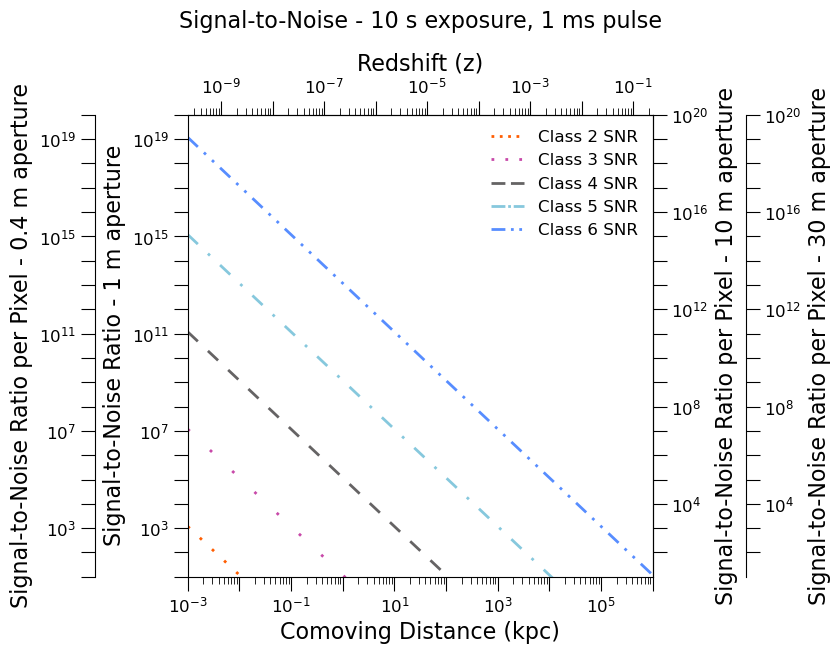

In [178]:
ylims = (1e1, 1e20)

fig, ax1 = plt.subplots(figsize=(6, 6), dpi=100)

## Plotting SNR vs. Distance
plt.plot(dist, SNR_S2p, label='SNR Class 2', color=colors[2], linewidth=2, linestyle=(0, (1, 5)))
plt.plot(dist, SNR_S3p, label='SNR Class 3', color=colors[3], linewidth=2, linestyle=(0, (1, 10)))
plt.plot(dist, SNR_S4p, label='SNR Class 4', color=colors[4], linewidth=2, linestyle=(0, (5, 5)))
plt.plot(dist, SNR_S5p, label='SNR Class 5', color=colors[5], linewidth=2, linestyle=(0, (5, 5, 1, 5)))
plt.plot(dist, SNR_S6p, label='SNR Class 6', color=colors[6], linewidth=2, linestyle=(0, (5, 3, 1, 3, 1, 3)))

## General plot settings
plt.title('Signal-to-Noise - 10 s exposure, 1 ms pulse', fontsize=16, y=1.17)
plt.xlabel("Comoving Distance (kpc)", fontsize=16)
plt.xscale('log')
plt.yscale('log')

## Custom Legend
custom_handles = [
    Line2D([0], [0], color=colors[2], lw=2, linestyle=(0, (1, 2, 1, 2, 1, 2, 1, 5)), label='Class 2 SNR'),    
    Line2D([0], [0], color=colors[3], lw=2, linestyle=(0, (1, 4)), label='Class 3 SNR'),
    Line2D([0], [0], color=colors[4], lw=2, linestyle=(0, (5, 2)), label='Class 4 SNR'),    
    Line2D([0], [0], color=colors[5], lw=2, linestyle=(0, (5, 1, 1, 1)), label='Class 5 SNR'),
    Line2D([0], [0], color=colors[6], lw=2, linestyle=(0, (5, 2, 1, 2, 1, 3)), label='Class 6 SNR')
]
plt.legend(handles=custom_handles, loc='upper right', frameon=False, fontsize=12)

## Axes settings
locator = LogLocator(base=10.0, numticks=30)  # Adjust numticks for desired range
x_ticks = [float(10**i) for i in range(int(np.floor(np.log10(dist.value.min()))), int(np.ceil(np.log10(dist.value.max())) + 1))]
ax1.set_xticks(x_ticks)
ax1.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=20))
plt.xlim(dist.value.min(), dist.value.max())
plt.ylim(ylims)
ax1.tick_params('x', length=10, which='major')
ax1.tick_params('x', length=5, which='minor')

ax2 = ax1.secondary_yaxis('right', functions=(lambda SNR: SNR*SNR_10m, lambda SNR: SNR/SNR_10m))
ax3 = ax1.secondary_yaxis(1.2, functions=(lambda SNR: SNR*SNR_30m, lambda SNR: SNR/SNR_30m))
ax4 = ax1.secondary_yaxis(-0.2, functions=(lambda SNR: SNR*SNR_04m, lambda SNR: SNR/SNR_04m))

# Adjust position of new axes to prevent overlap
ax3.spines['right'].set_position(('axes', 1.2))  # Move the third axis further to the right
ax4.spines['left'].set_position(('axes', -0.2))  # Move the fourth axis to the left

axes = [ax1, ax2, ax3, ax4]

for j, ax in enumerate(axes):
    ax.tick_params('y', length=10, which='major')
    ax.tick_params('y', length=5, which='minor')

    ax_lims = A_scale_p[j]*ylims
    ax_ticks = [float(10**i) for i in range(int(np.floor(np.log10(ax_lims[0]))), int(np.ceil(np.log10(ax_lims[1])) + 1))]
    ax.set_yticks(ax_ticks)

    for i, label in enumerate(ax.yaxis.get_ticklabels()):
        if j == 3:
            label.set_visible((i+1) % 4 == 0)
        else:
            label.set_visible((i+2) % 4 == 0)


ax1.set_ylabel("Signal-to-Noise Ratio - 1 m aperture", fontsize=16)
ax2.set_ylabel("Signal-to-Noise Ratio per Pixel - 10 m aperture", fontsize=16)
ax3.set_ylabel("Signal-to-Noise Ratio per Pixel - 30 m aperture", fontsize=16)
ax4.set_ylabel("Signal-to-Noise Ratio per Pixel - 0.4 m aperture", fontsize=16)

## Add x-axis for redshift
secax = ax1.secondary_xaxis('top', functions=(kpc_to_z, z_to_kpc))
secax.set_xlabel('Redshift (z)', fontsize=16)
secax.set_xscale('log') # Example scale

secax_ticks = [10**i for i in range(-9, 2)]
secax.set_xticks(secax_ticks)

secax.minorticks_on()
secax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=20))

secax.tick_params('x', length=10, which='major')
secax.tick_params('x', length=5, which='minor')

for ax in (ax1, secax):
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        label.set_visible(i % 2 == 0)

plt.show()